In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [235]:
df=pd.read_csv("LoanApprovalPrediction.csv")

In [236]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [238]:
df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,598,598,598,586.000000,598,598,598.000000,598.000000,577.000000,584.000000,549.000000,598,598
unique,598,2,2,NaN,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002990,Male,Yes,NaN,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,487,388,NaN,465,488,NaN,NaN,NaN,NaN,NaN,225,411
mean,NaN,NaN,NaN,0.755973,NaN,NaN,5292.252508,1631.499866,144.968804,341.917808,0.843352,NaN,NaN
std,NaN,NaN,NaN,1.007751,NaN,NaN,5807.265364,2953.315785,82.704182,65.205994,0.363800,NaN,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,0.000000,NaN,NaN,2877.500000,0.000000,100.000000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,0.000000,NaN,NaN,3806.000000,1211.500000,127.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,1.750000,NaN,NaN,5746.000000,2324.000000,167.000000,360.000000,1.000000,NaN,NaN


In [239]:
df.isna().sum().sum()

np.int64(96)

In [240]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [241]:
#increase count by 1 when any row contains a null value.
count=0
for column in df.isnull().values:
    count+=column.any()
    
print(count,"different rows have one or more null values")


93 different rows have one or more null values


In [242]:
gender_group=df.groupby('Gender')['Loan_Status'].value_counts(normalize=True).reset_index()
gender_group

,Gender,Loan_Status,proportion
0,Female,Y,0.666667
1,Female,N,0.333333
2,Male,Y,0.691992
3,Male,N,0.308008


### Outliers

In [243]:
df['ApplicantIncome'].describe()

count      598.000000
mean      5292.252508
std       5807.265364
min        150.000000
25%       2877.500000
50%       3806.000000
75%       5746.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [244]:
def outliyers(column):
    Q1=column.quantile(0.25)
    Q3=column.quantile(0.75)

    IQR=Q3-Q1
    lower_t=Q1-IQR
    upper_t=Q3+IQR*1.5
    min_out_c=df['ApplicantIncome']<lower_t
    max_out_c=df['ApplicantIncome']>upper_t
    return min_out_c,max_out_c

In [245]:
#upper_t_mask,lower_t_mask=
lower_mask,upper_mask=outliyers(df['ApplicantIncome'])

In [246]:
df[lower_mask].head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [247]:
df[upper_mask].head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,LP001020,Male,Yes,1.0,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
33,LP001100,Male,No,3.0,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N
53,LP001186,Female,Yes,1.0,Graduate,Yes,11500,0.0,286.0,360.0,0.0,Urban,N
66,LP001233,Male,Yes,1.0,Graduate,No,10750,0.0,312.0,360.0,1.0,Urban,Y
101,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y


In [248]:
litracy_group=df.groupby('Education')['Loan_Status'].value_counts(normalize=True)
litracy_group

Education     Loan_Status
Graduate      Y              0.707527
              N              0.292473
Not Graduate  Y              0.616541
              N              0.383459
Name: proportion, dtype: float64

In [249]:
credit_group=df.groupby('Credit_History')['Loan_Status'].value_counts(normalize=True)
credit_group

Credit_History  Loan_Status
0.0             N              0.918605
                Y              0.081395
1.0             Y              0.794816
                N              0.205184
Name: proportion, dtype: float64

In [250]:
property_group=df.groupby('Property_Area')['Loan_Status'].value_counts(normalize=True)
df_pro=pd.DataFrame(data=property_group.reset_index())
df_pro.head()

,Property_Area,Loan_Status,proportion
0,Rural,Y,0.617143
1,Rural,N,0.382857
2,Semiurban,Y,0.768889
3,Semiurban,N,0.231111
4,Urban,Y,0.656566


<BarContainer object of 6 artists>

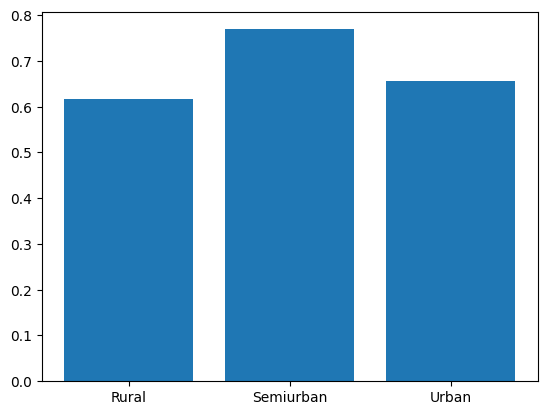

In [251]:
plt.bar(x=df_pro['Property_Area'],height=df_pro['proportion'])

In [252]:
df['Loan_Status']=df['Loan_Status'].replace({'Y':1,'N':0})

C:\Users\fvcds\AppData\Local\Temp\ipykernel_5608\2869235956.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Loan_Status']=df['Loan_Status'].replace({'Y':1,'N':0})


In [253]:
df['Education']=df['Education'].replace({'Not Graduate':0,'Graduate':1})

C:\Users\fvcds\AppData\Local\Temp\ipykernel_5608\867373971.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Education']=df['Education'].replace({'Not Graduate':0,'Graduate':1})


In [254]:
df['Property_Area']=df['Property_Area'].replace({'Rural':0,'Urban':1,'Semiurban':2})

C:\Users\fvcds\AppData\Local\Temp\ipykernel_5608\3197701024.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Property_Area']=df['Property_Area'].replace({'Rural':0,'Urban':1,'Semiurban':2})


In [255]:
df['Self_Employed']=df['Self_Employed'].replace({'No':0,'Yes':1})

C:\Users\fvcds\AppData\Local\Temp\ipykernel_5608\82004453.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Self_Employed']=df['Self_Employed'].replace({'No':0,'Yes':1})


In [256]:
corr_matrix = df.drop(columns='Loan_ID',axis=1).corr(numeric_only=True)

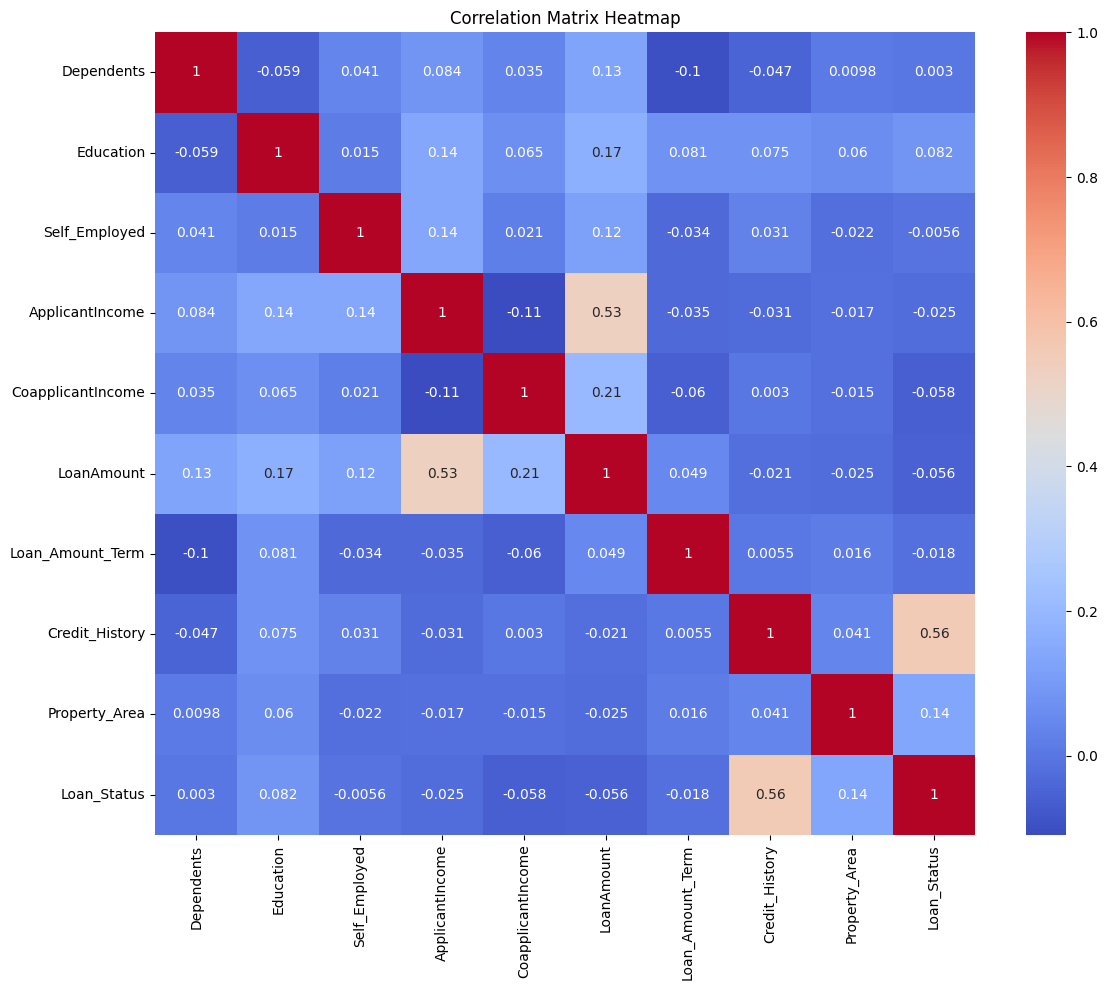

In [257]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

In [258]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,1,0,5849,0.0,NaN,360.0,1.0,1,1
1,LP001003,Male,Yes,1.0,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,Male,Yes,0.0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,Male,Yes,0.0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,Male,No,0.0,1,0,6000,0.0,141.0,360.0,1.0,1,1


In [259]:
df.duplicated().sum()

np.int64(0)

In [260]:
df1=df.drop(columns=['Loan_ID','Gender','Married'],axis=1)

In [261]:
df_f=df1.dropna(axis=0)

In [262]:
df_f.isna().sum()

Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [263]:
df_f.shape

(505, 10)

In [264]:
name='preprocess_data'

In [266]:
df_f.to_csv(name+'.csv')